In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [6]:
df=pd.read_csv(r"D:\Downloads\SALESDATA.xlsx - AmazonFoodCategory_1 Dataset.csv",parse_dates=['DateKey','Invoice Date', 'Promised Delivery Date'])

In [46]:
pd.crosstab(index=df['Item'],columns='count').shape

(657, 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65280 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        56996 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

In [9]:
df.isnull().sum()

CustKey                                0
DateKey                                0
Discount Amount                        2
Invoice Date                           0
Invoice Number                         0
Item Class                          8286
Item Number                           41
Item                                   0
Line Number                            0
List Price                             0
Order Number                           0
Promised Delivery Date                 0
Sales Amount                           0
Sales Amount Based on List Price       0
Sales Cost Amount                      0
Sales Margin Amount                    0
Sales Price                            1
Sales Quantity                         0
Sales Rep                              0
U/M                                    0
dtype: int64

In [10]:
df['Invoice_Year']= df['Invoice Date'].dt.year
df['Invoice_Month']= df['Invoice Date'].dt.month
df['Invoice_Quarter']= df['Invoice Date'].dt.quarter
df['Invoice_Day']= df['Invoice Date'].dt.day

In [11]:
df['Invoice_Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],inplace=True)

In [12]:
#filtering columns that are required 
data= df[['CustKey','Item','Sales Cost Amount','Invoice Number','Invoice Date','Invoice_Year','Invoice_Quarter','Invoice_Month','Invoice_Day',
                          'Sales Quantity','Sales Amount','Sales Amount Based on List Price','Discount Amount','Sales Margin Amount']]
data.describe()


,CustKey,Sales Cost Amount,Invoice Number,Invoice_Year,Invoice_Quarter,Invoice_Day,Sales Quantity,Sales Amount,Sales Amount Based on List Price,Discount Amount,Sales Margin Amount
count,6.528200e+04,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65280.000000,65282.000000
mean,1.001770e+07,1660.979228,216223.662020,2017.960877,2.414249,16.155878,45.084311,2852.038373,4707.473613,1855.574835,1191.059145
std,7.176148e+03,9556.485250,94992.281866,0.946608,1.160940,8.795214,429.661793,15164.342107,20696.443785,9037.140888,5860.787502
min,1.000045e+07,0.000000,100012.000000,2017.000000,1.000000,1.000000,-1.000000,200.010000,0.000000,-255820.800000,-3932.930000
25%,1.001272e+07,167.790000,117931.000000,2017.000000,1.000000,9.000000,2.000000,308.387500,561.040000,246.037500,129.950000
50%,1.001966e+07,304.500000,222869.500000,2018.000000,2.000000,16.000000,3.000000,553.940000,998.160000,441.760000,246.490000
75%,1.002351e+07,687.320000,314318.750000,2019.000000,3.000000,24.000000,8.000000,1280.042500,2315.040000,999.760000,579.530000
max,1.002758e+07,366576.000000,332842.000000,2019.000000,4.000000,31.000000,16000.000000,555376.000000,632610.160000,343532.660000,188800.000000


In [13]:
data['Sales Amount Based on List Price'].replace(0,np.nan,inplace=True)
data['Sales Quantity'].replace(-1,np.nan,inplace=True)

data=data.dropna()

C:\Users\neelk\AppData\Local\Temp\ipykernel_19092\3019571160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales Amount Based on List Price'].replace(0,np.nan,inplace=True)
C:\Users\neelk\AppData\Local\Temp\ipykernel_19092\3019571160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales Quantity'].replace(-1,np.nan,inplace=True)


<AxesSubplot:>

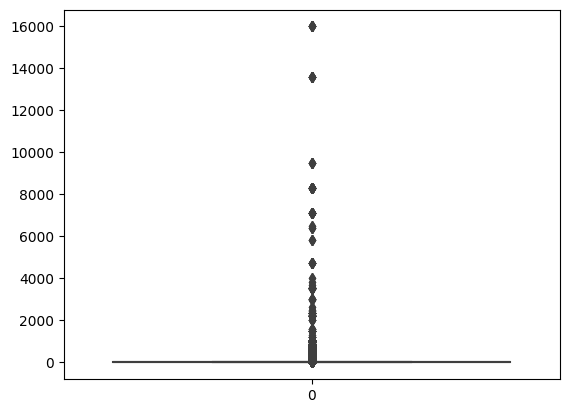

In [14]:
sns.boxplot(data['Sales Quantity'])

In [15]:
#Removing Outliers 
def Outliers(x):
  Q1 = data[x].quantile(0.25)
  Q3 = data[x].quantile(0.75)
  IQR = Q3 - Q1
  # Define a threshold for outliers
  threshold = 1.5 * IQR
  print(threshold)
  # Identify and remove outliers
  x = data[(df[x] >= Q1 - threshold) & (df[x] <= Q3 + threshold)]
  return x


data = Outliers('Sales Quantity')

data.describe()

  


9.0


C:\Users\neelk\AppData\Local\Temp\ipykernel_19092\1870176177.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = data[(df[x] >= Q1 - threshold) & (df[x] <= Q3 + threshold)]


,CustKey,Sales Cost Amount,Invoice Number,Invoice_Year,Invoice_Quarter,Invoice_Day,Sales Quantity,Sales Amount,Sales Amount Based on List Price,Discount Amount,Sales Margin Amount
count,5.564300e+04,55643.000000,55643.000000,55643.000000,55643.000000,55643.000000,55643.000000,55643.000000,55643.000000,55643.000000,55643.000000
mean,1.001766e+07,519.600333,216312.255450,2017.963697,2.408767,16.152760,3.766170,924.296507,1716.384481,792.087974,404.696174
std,7.205433e+03,752.384122,94974.795088,0.946491,1.158153,8.789594,3.407364,1295.841572,2450.657843,1172.310204,582.408325
min,1.000045e+07,0.000000,100034.000000,2017.000000,1.000000,1.000000,1.000000,200.010000,195.610000,-156.020000,-237.550000
25%,1.001272e+07,159.140000,117961.500000,2017.000000,1.000000,9.000000,1.000000,294.490000,548.660000,245.630000,122.670000
50%,1.001966e+07,274.530000,222884.000000,2018.000000,2.000000,16.000000,2.000000,488.230000,892.240000,406.987500,214.200000
75%,1.002351e+07,536.480000,314275.000000,2019.000000,3.000000,24.000000,5.000000,912.340000,1663.600000,783.190000,418.520000
max,1.002758e+07,11397.700000,332842.000000,2019.000000,4.000000,31.000000,17.000000,22085.600000,44171.200000,22969.020000,10687.900000


In [16]:
# #creating profit and discount percentages 
# data['discount_percentage'] = data.apply(lambda row: (row['Discount Amount'] / row['Sales Amount Based on List Price']) * 100, axis=1)
# data['profit_percentage'] = data.apply(lambda row: (row['Sales Margin Amount'] / row['Sales Amount']) * 100, axis=1)
data


,CustKey,Item,Sales Cost Amount,Invoice Number,Invoice Date,Invoice_Year,Invoice_Quarter,Invoice_Month,Invoice_Day,Sales Quantity,Sales Amount,Sales Amount Based on List Price,Discount Amount,Sales Margin Amount
0,10000460,Nationeel Salted Pretzels,59.73,119156,2017-01-01,2017,1,Jan,1,2.0,204.84,362.88,158.04,145.11
1,10000460,Ebony Prepared Salad,278.38,119156,2017-01-01,2017,1,Jan,1,1.0,545.54,966.44,420.90,267.16
2,10000460,Thresher Spicy Mints,488.68,119156,2017-01-01,2017,1,Jan,1,3.0,859.84,1523.25,663.41,371.16
3,10000460,Big Time Frozen Cheese Pizza,84.23,119156,2017-01-01,2017,1,Jan,1,1.0,232.58,412.03,179.45,148.35
4,10000460,Red Spade Turkey Hot Dogs,957.15,119156,2017-01-01,2017,1,Jan,1,3.0,1965.58,3482.10,1516.52,1008.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65270,10023511,Landslide French Roast Coffee,88.14,329641,2019-12-31,2019,4,Dec,31,2.0,218.01,415.00,196.99,129.87
65271,10023511,Red Spade Foot-Long Hot Dogs,1427.24,329619,2019-12-31,2019,4,Dec,31,3.0,2565.37,4883.52,2318.15,1138.13
65272,10023511,BBB Best Apple Butter,307.80,329641,2019-12-31,2019,4,Dec,31,2.0,541.22,1030.28,489.06,233.42
65273,10023511,Walrus Light Beer,465.89,329641,2019-12-31,2019,4,Dec,31,5.0,757.27,1441.55,684.28,291.38


In [17]:
pd.crosstab(index =data['CustKey'],columns='count')


col_0,count
CustKey,
10000453,322
10000455,16
10000456,88
10000457,16
10000458,6
...,...
10027381,106
10027560,42
10027572,52


In [18]:
year=data.groupby('Invoice_Year')
y1=year.get_group(2017)
y2=year.get_group(2018)
y3=year.get_group(2019)

<AxesSubplot:>

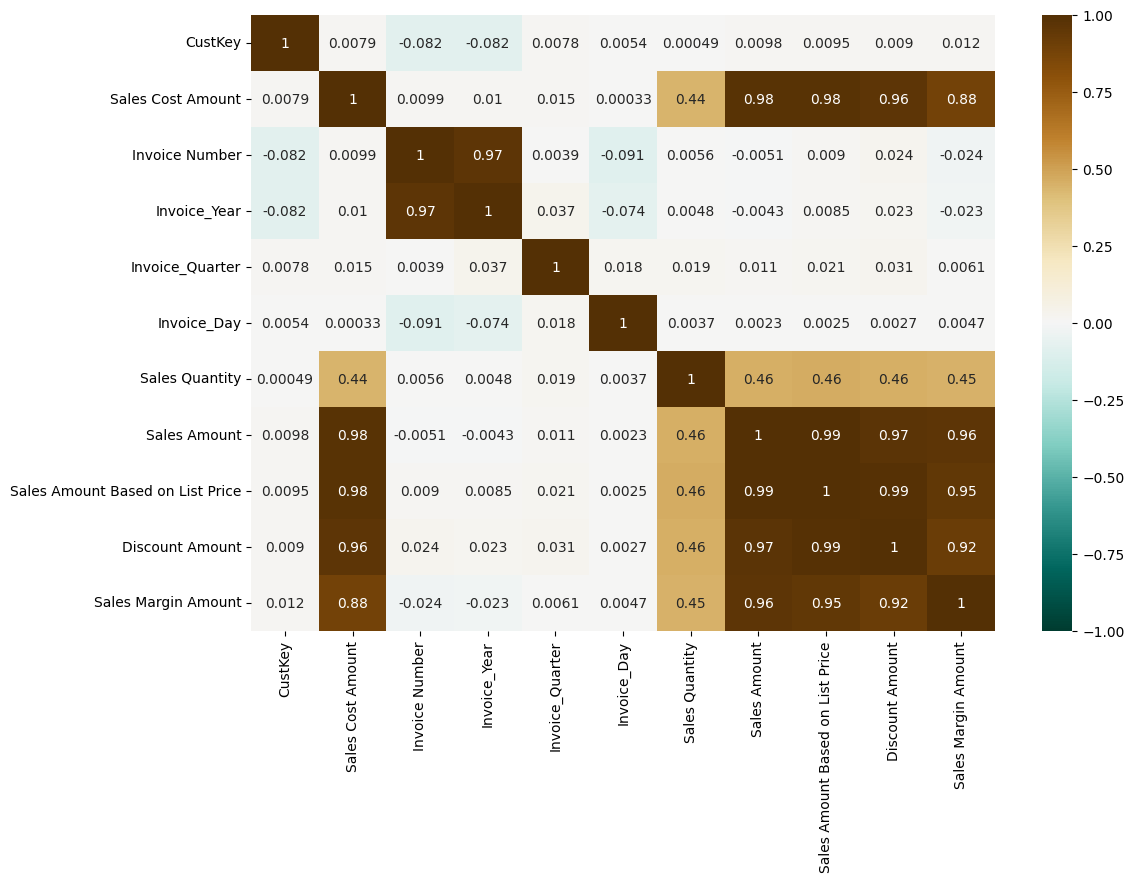

In [19]:
#checking the correlation
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(method='pearson'),annot=True, vmin=-1, vmax=1, cmap='BrBG_r')

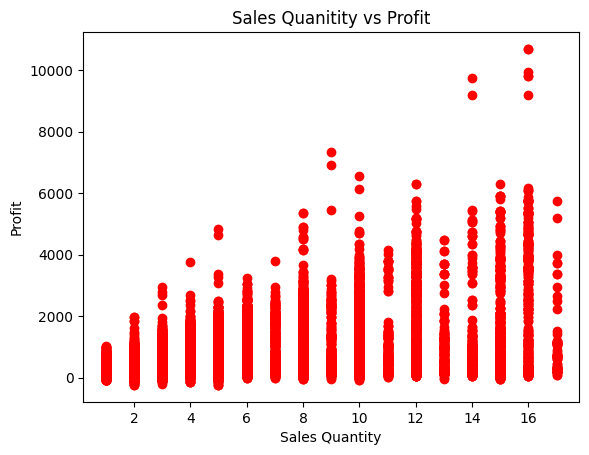

In [20]:
plt.scatter(data['Sales Quantity'],data['Sales Margin Amount'],c='red')
plt.title('Sales Quanitity vs Profit')
plt.xlabel('Sales Quantity')
plt.ylabel('Profit')
plt.show()

In [21]:
# # sns.boxplot(data['Sales Quantity'])
# sns.pairplot(data,kind="scatter")
# plt.show()


In [22]:
Yearly_Sales =  data

,Invoice_Year,Sales Amount
0,2017,24040631.21
1,2018,5509250.93
2,2019,21880748.39


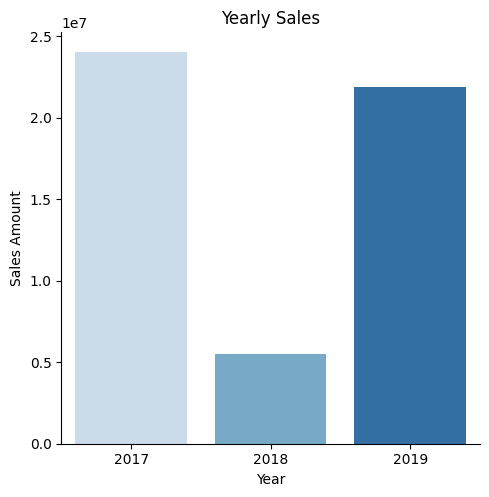

In [23]:
Yearly_Sales01 = Yearly_Sales.groupby('Invoice_Year').sum().reset_index()
sns.catplot(y = 'Sales Amount', x = 'Invoice_Year', data = Yearly_Sales01, palette='Blues',kind="bar")
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title('Yearly Sales')
Yearly_Sales01[['Invoice_Year', 'Sales Amount']]

<AxesSubplot:xlabel='Invoice_Month', ylabel='Sales Amount'>

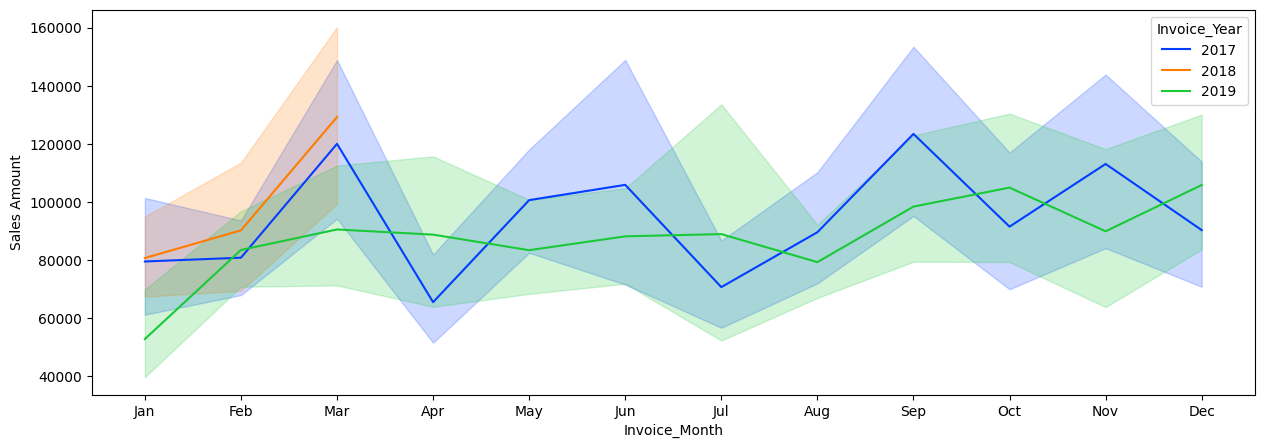

In [24]:
plt.figure(figsize = (15,5))
sns.lineplot(y ='Sales Amount', x = 'Invoice_Month',
             data= data.groupby(['Invoice Date','Invoice_Year','Invoice_Month']).sum(),
             hue = 'Invoice_Year', palette='bright')

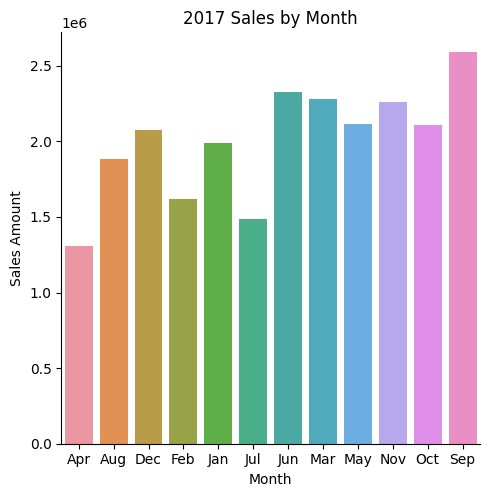

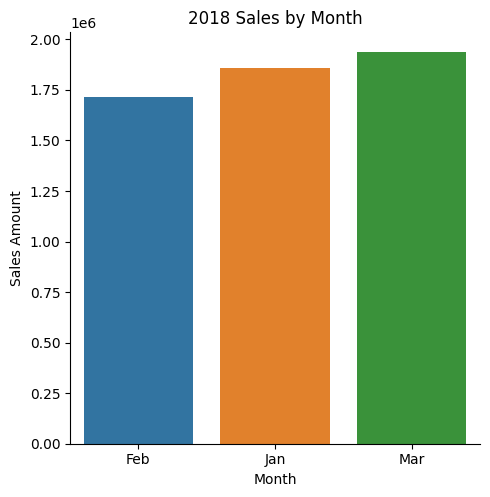

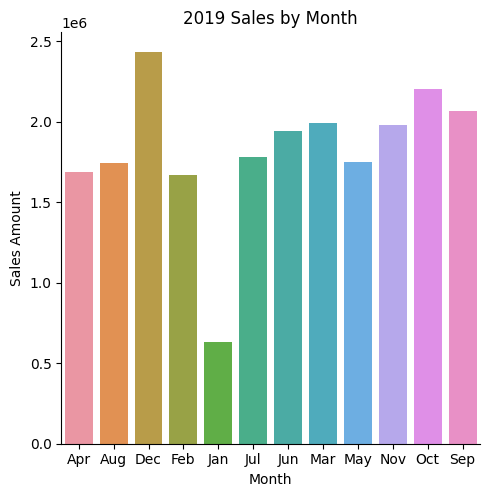

In [25]:
n=2017
for i in y1,y2,y3:
    l=i.groupby('Invoice_Month').sum().reset_index()
    sns.catplot(y = 'Sales Amount', x = 'Invoice_Month', data = l,kind="bar")
    plt.xlabel('Month')
    plt.ylabel('Sales Amount')
    plt.title(f'{n} Sales by Month')
    n=n+1


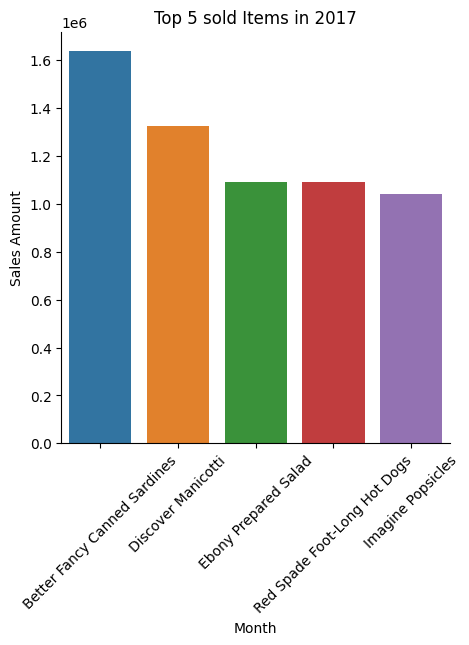

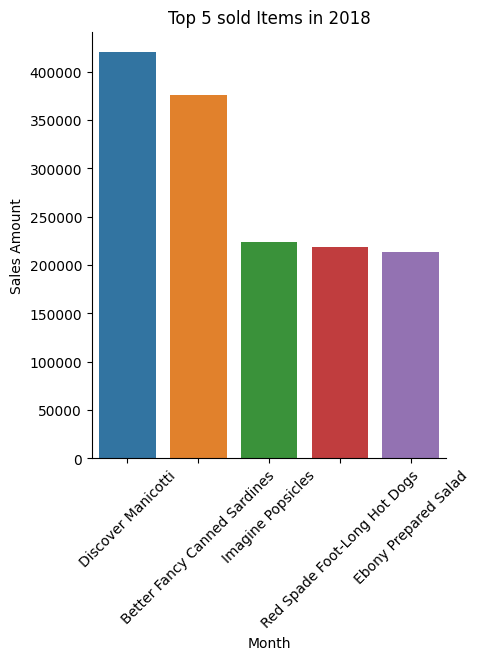

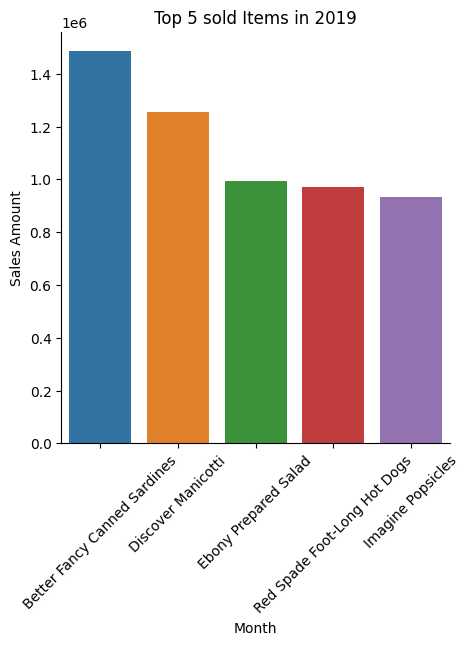

In [26]:
n=2017
for i in y1,y2,y3:
  x=i.groupby('Item').sum().reset_index()
  a=x.sort_values(by='Sales Amount',ascending=False).head()

  sns.catplot(y = 'Sales Amount', x = 'Item', data = a ,kind="bar")
  plt.xlabel('Month')
  plt.ylabel('Sales Amount')
  plt.xticks(rotation=45)
  plt.title(f'Top 5 sold Items in {n}')
  n=n+1

Text(0.5, 1.0, 'Top 5 Profitable Items in ')

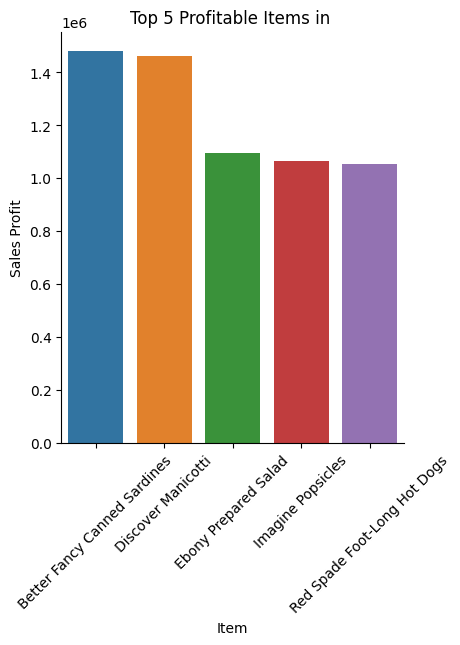

In [27]:
x=data.groupby('Item').sum().reset_index()
a=x.sort_values(by='Sales Margin Amount',ascending=False).head()

sns.catplot(y = 'Sales Margin Amount', x = 'Item', data = a ,kind="bar")
plt.xlabel('Item')
plt.ylabel('Sales Profit')
plt.xticks(rotation=45)
plt.title('Top 5 Profitable Items in ')

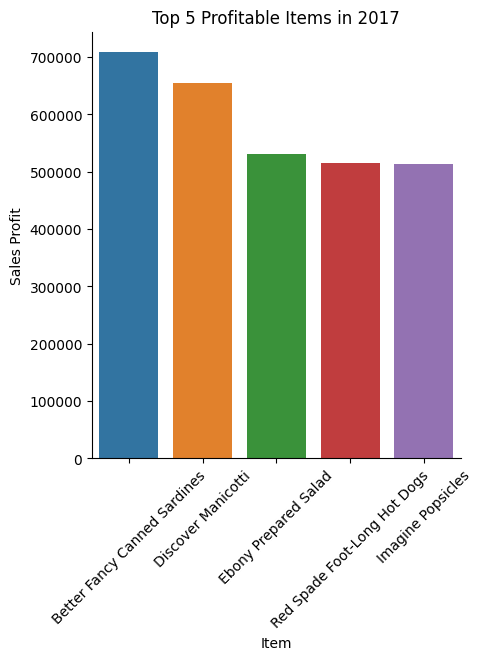

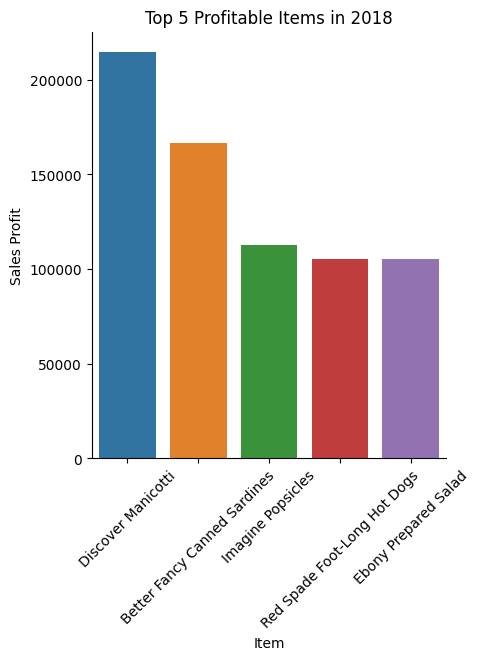

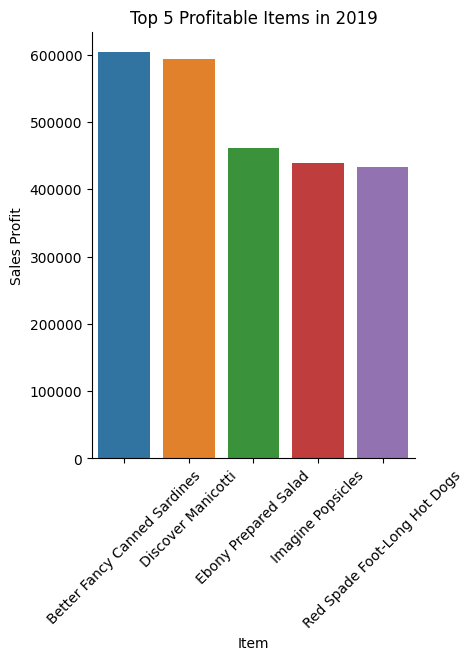

In [28]:
n=2017
for i in y1,y2,y3:
  x=i.groupby('Item').sum().reset_index()
  a=x.sort_values(by='Sales Margin Amount',ascending=False).head()

  sns.catplot(y = 'Sales Margin Amount', x = 'Item', data = a ,kind="bar")
  plt.xlabel('Item')
  plt.ylabel('Sales Profit')
  plt.xticks(rotation=45)
  plt.title(f'Top 5 Profitable Items in {n}')
  n=n+1

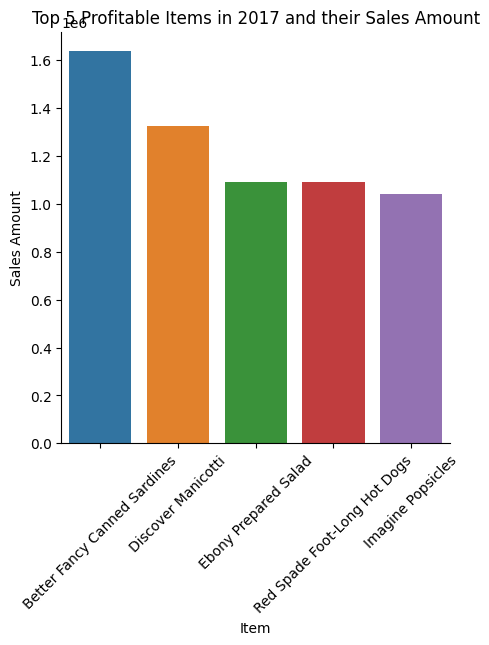

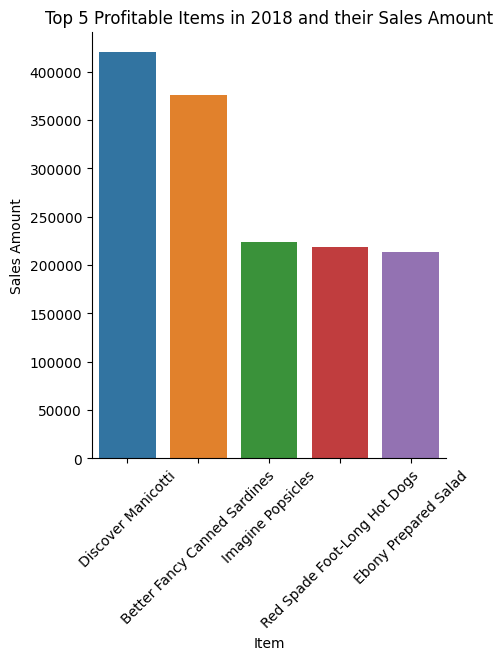

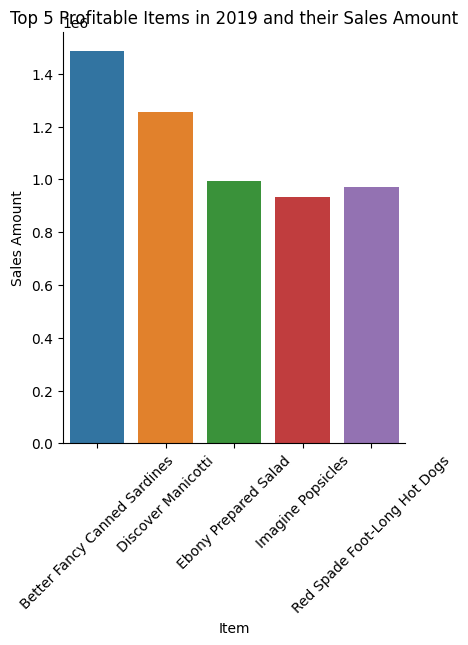

In [29]:
n=2017
for i in y1,y2,y3:
  x=i.groupby('Item').sum().reset_index()
  a=x.sort_values(by='Sales Margin Amount',ascending=False).head()

  sns.catplot(y = 'Sales Amount', x = 'Item', data = a ,kind="bar")
  plt.xlabel('Item')
  plt.ylabel('Sales Amount')
  plt.xticks(rotation=45)
  plt.title(f'Top 5 Profitable Items in {n} and their Sales Amount')
  n=n+1

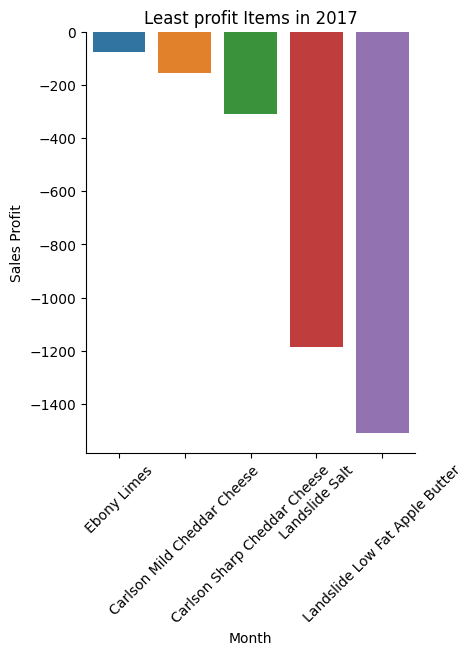

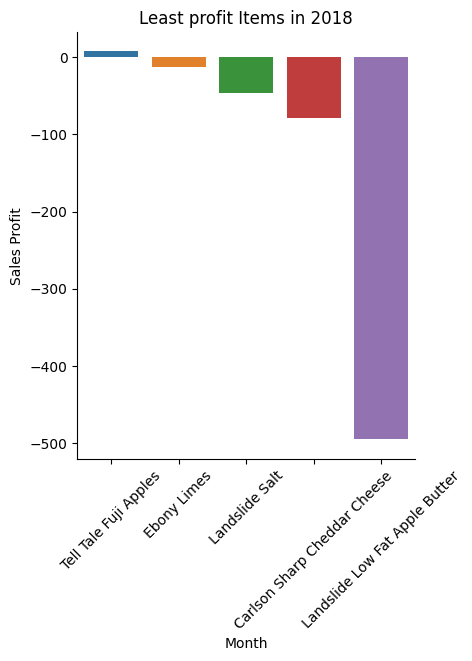

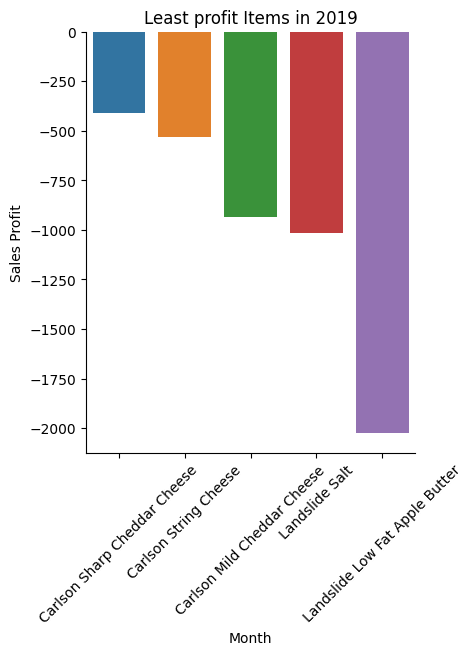

In [30]:
n=2017
for i in y1,y2,y3:
  x=i.groupby('Item').sum().reset_index()
  a=x.sort_values(by='Sales Margin Amount',ascending=False).tail()

  sns.catplot(y = 'Sales Margin Amount', x = 'Item', data = a ,kind="bar")
  plt.xlabel('Month')
  plt.ylabel('Sales Profit')
  plt.xticks(rotation=45)
  plt.title(f'Least profit Items in {n}')
  n=n+1

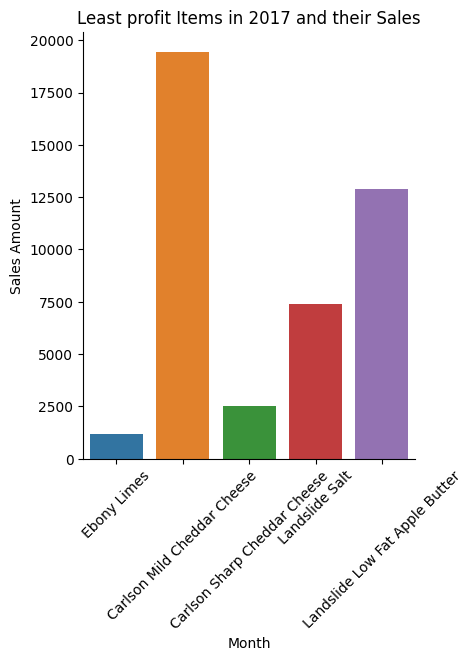

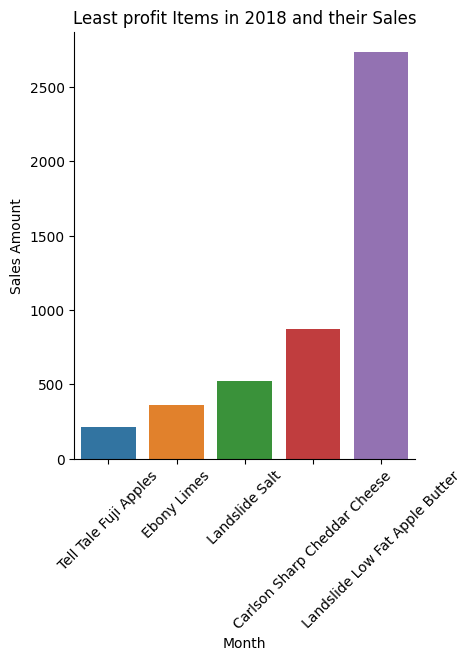

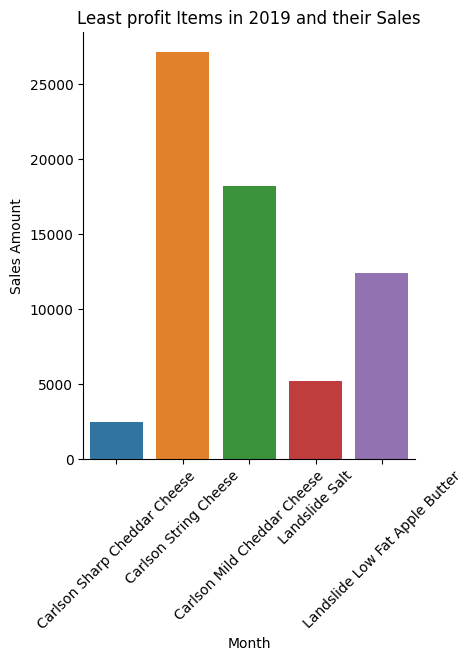

In [31]:
n=2017
for i in y1,y2,y3:
  x=i.groupby('Item').sum().reset_index()
  a=x.sort_values(by='Sales Margin Amount',ascending=False).tail()

  sns.catplot(y = 'Sales Amount', x = 'Item', data = a ,kind="bar")
  plt.xlabel('Month')
  plt.ylabel('Sales Amount')
  plt.xticks(rotation=45)
  plt.title(f'Least profit Items in {n} and their Sales')
  n=n+1

In [32]:
mybasket=data.groupby(['Invoice Number','Item'])['Sales Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice Number')

In [33]:
mybasket.head()

Item,American Chicken Hot Dogs,American Corned Beef,American Pimento Loaf,American Potato Salad,American Roasted Chicken,American Sliced Ham,Applause Canned Mixed Fruit,Atomic Bubble Gum,Atomic Mint Chocolate Bar,Atomic Mints,...,Walrus White Zinfandel Wine,Washington Apple Drink,Washington Apple Juice,Washington Berry Juice,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Strawberry Drink
Invoice Number,,,,,,,,,,,,,,,,,,,,,
100034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
mybasket_set = mybasket.applymap(encode) 

In [49]:
#Generating frequent itemsets
Freq_item=apriori(mybasket_set,min_support=0.00009,use_colnames=True,max_len=2)

C:\Users\neelk\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


MemoryError: Unable to allocate 43.4 GiB for an array with shape (141778, 2, 20535) and data type int64

In [36]:
#generaring rules
my_rules=association_rules(Freq_item,metric="lift",min_threshold=0.3)

In [37]:
my_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Atomic Mint Chocolate Bar),(American Corned Beef),0.040760,0.002971,0.001023,0.025090,8.446148,0.000902,1.022688
1,(American Corned Beef),(Atomic Mint Chocolate Bar),0.002971,0.040760,0.001023,0.344262,8.446148,0.000902,1.462841
2,(American Corned Beef),(Better Fancy Canned Sardines),0.002971,0.075286,0.001364,0.459016,6.096961,0.001140,1.709320
3,(Better Fancy Canned Sardines),(American Corned Beef),0.075286,0.002971,0.001364,0.018111,6.096961,0.001140,1.015420
4,(American Corned Beef),(Big Time Home Style French Fries),0.002971,0.020648,0.001266,0.426230,20.642979,0.001205,1.706871
...,...,...,...,...,...,...,...,...,...
5897,(Washington Mango Drink),(Urban Large Brown Eggs),0.008571,0.007451,0.001071,0.125000,16.776961,0.001007,1.134342
5898,(Urban Small Eggs),(Walrus Imported Beer),0.003555,0.003165,0.001217,0.342466,108.192835,0.001206,1.516019
5899,(Walrus Imported Beer),(Urban Small Eggs),0.003165,0.003555,0.001217,0.384615,108.192835,0.001206,1.619223
5900,(Washington Diet Soda),(Washington Cream Soda),0.004529,0.008522,0.001802,0.397849,46.684793,0.001763,1.646562


In [38]:
mybasket_set['Atomic Mint Chocolate Bar'].sum()

837

In [39]:
mybasket_set['Better Fancy Canned Sardines'].sum()

1546

In [40]:
my_rules[(my_rules['confidence']>0.1) & ( my_rules['lift']>=2)].to_csv('rules.csv')
data.to_csv('Orginal.csv')

In [41]:
x=my_rules[(my_rules['confidence']>0.1) & ( my_rules['lift']>=2)]
x
x[x['antecedents']==frozenset({'Atomic Mint Chocolate Bar'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
116,(Atomic Mint Chocolate Bar),(Better Fancy Canned Sardines),0.04076,0.075286,0.010226,0.250896,3.332568,0.007158,1.234427
119,(Atomic Mint Chocolate Bar),(Big Time Frozen Cheese Pizza),0.04076,0.031702,0.004237,0.103943,3.278744,0.002945,1.080621
120,(Atomic Mint Chocolate Bar),(Big Time Home Style French Fries),0.04076,0.020648,0.006720,0.164875,7.985139,0.005879,1.172701
128,(Atomic Mint Chocolate Bar),(Bravo Canned Tomatos),0.04076,0.028975,0.007110,0.174432,6.020120,0.005929,1.176191
131,(Atomic Mint Chocolate Bar),(Bravo Canned Yams),0.04076,0.040419,0.007792,0.191159,4.729455,0.006144,1.186366
133,(Atomic Mint Chocolate Bar),(Bravo Large Canned Shrimp),0.04076,0.043243,0.008522,0.209080,4.834976,0.006759,1.209676
144,(Atomic Mint Chocolate Bar),(Colony Blueberry Muffins),0.04076,0.021037,0.005649,0.138590,6.587847,0.004791,1.136466
162,(Atomic Mint Chocolate Bar),(Ebony Macintosh Apples),0.04076,0.030241,0.007305,0.179211,5.926099,0.006072,1.181497
167,(Atomic Mint Chocolate Bar),(Ebony Prepared Salad),0.04076,0.068858,0.012077,0.296296,4.303002,0.009270,1.323202
169,(Atomic Mint Chocolate Bar),(Ebony Squash),0.04076,0.032384,0.007938,0.194743,6.013609,0.006618,1.201624


In [42]:
dataset_combo2 =x.groupby(['antecedents','consequents']).size()
dataset_combo2.head()

antecedents             consequents                       
(American Corned Beef)  (Atomic Mint Chocolate Bar)           1
                        (Better Fancy Canned Sardines)        1
                        (Big Time Home Style French Fries)    1
                        (Bravo Canned Tomatos)                1
                        (Bravo Canned Yams)                   1
dtype: int64

In [43]:
#create a sorted dataframe by the most frequent combinations.
dataset =dataset_combo2.reset_index()
dataset.columns = ['A','B',"Size"]
dataset.sort_values(by='Size',ascending =False, inplace =True)
dataset[dataset['A']==frozenset({'Urban Small Eggs'})]

,A,B,Size
704,(Urban Small Eggs),(Atomic Semi-Sweet Chocolate Bar),1
694,(Urban Small Eggs),(Fast BBQ Potato Chips),1
695,(Urban Small Eggs),(Red Spade Beef Bologna),1
696,(Urban Small Eggs),(Red Spade Turkey Hot Dogs),1
697,(Urban Small Eggs),(Shady Lake Thai Rice),1
698,(Urban Small Eggs),(Colony Blueberry Muffins),1
699,(Urban Small Eggs),(Bravo Canned Tomatos),1
700,(Urban Small Eggs),(Fast Dried Apples),1
701,(Urban Small Eggs),(High Top Dried Mushrooms),1
702,(Urban Small Eggs),(Imagine Popsicles),1


In [48]:
data.shape

(55643, 14)